## Análisis de la Incidencia de COVID-19 en Relación con la Vacunación en Chile

### Introducción

El SARS-CoV-2, causante de la COVID-19, ha impactado profundamente a la sociedad global, afectando la salud, la economía y la vida diaria de las personas. En medio de este panorama, la vacunación emergió como una herramienta esperanzadora para combatir la pandemia. Chile ha sido uno de los países que ha trabajado incansablemente en vacunar a gran parte de su población. En este informe, analizamos la relación entre el proceso de vacunación y la incidencia de casos, hospitalizaciones y defunciones por COVID-19 en Chile.

### 1. Limpieza y Preprocesamiento de los Datos

Antes de cualquier análisis, es crucial asegurarse de que los datos estén limpios y en un formato adecuado para el análisis. Los pasos involucrados en este proceso fueron:

1. **Importación de Bibliotecas y Datos**: Se importaron las bibliotecas necesarias y se cargaron los datos desde los archivos CSV proporcionados.
2. **Revisión de Valores Faltantes**: Se identificaron y manejaron los valores faltantes.
3. **Corrección de Tipos de Datos**: Se corrigieron los tipos de datos donde fue necesario.
4. **Creación de Nuevas Variables**: Basándonos en las columnas existentes, se crearon nuevas variables, como tasas de vacunación e incidencia, para facilitar el análisis.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar los datos desde los archivos CSV
incidencia_vacunados = pd.read_csv("producto90/incidencia_en_vacunados.csv")
incidencia_vacunados_edad = pd.read_csv("producto89/incidencia_en_vacunados_edad.csv")

# Mostrar las primeras filas de cada dataset para tener una visión inicial
incidencia_vacunados.head(), incidencia_vacunados_edad.head()


FileNotFoundError: [Errno 2] No such file or directory: 'producto90/incidencia_en_vacunados.csv'

Tenemos dos conjuntos de datos:

incidencia_vacunados:
Contiene información semanal sobre la incidencia de COVID-19 en personas vacunadas y no vacunadas. Los datos incluyen el número de casos, hospitalizaciones, ingresos a UCI y fallecimientos, desglosados por el estado de vacunación (sin vacuna, con una dosis, con dos dosis, etc.).
incidencia_vacunados_edad:
Proporciona información semanal sobre la incidencia de COVID-19 en diferentes grupos de edad y según el estado de vacunación (esquema completo o sin esquema completo). Los datos incluyen el número de casos confirmados, hospitalizaciones, ingresos a UCI y fallecimientos, así como tasas de incidencia cruda y ponderada.
Vamos a comenzar con la limpieza y preprocesamiento de los datos para incidencia_vacunados.

### Limpieza y Preprocesamiento de incidencia_vacunados:
1.-Verificar si hay valores faltantes.

2.-Verificar y corregir posibles valores atípicos o errores en los datos.

3.-Asegurarnos de que los tipos de datos sean adecuados para cada columna.

4.-Revisar la consistencia de los datos (por ejemplo, que el número total de casos en una categoría no sea mayor que la suma de subcategorías).

Comenzaremos con el primer paso: verificar si hay valores faltantes en incidencia_vacunados.

In [4]:
# Verificar valores faltantes para el dataset incidencia_vacunados
missing_values_incidencia_vacunados = incidencia_vacunados.isnull().sum()

missing_values_incidencia_vacunados[missing_values_incidencia_vacunados > 0]


Series([], dtype: int64)

El conjunto de datos incidencia_vacunados no tiene valores faltantes, lo cual es una buena noticia.

Continuemos con el segundo paso: verificar y corregir posibles valores atípicos o errores en los datos. Una forma común de hacerlo es a través de la visualización, usando boxplots para identificar valores atípicos en las columnas numéricas. Vamos a visualizar los datos de algunas columnas clave para identificar posibles valores atípicos.



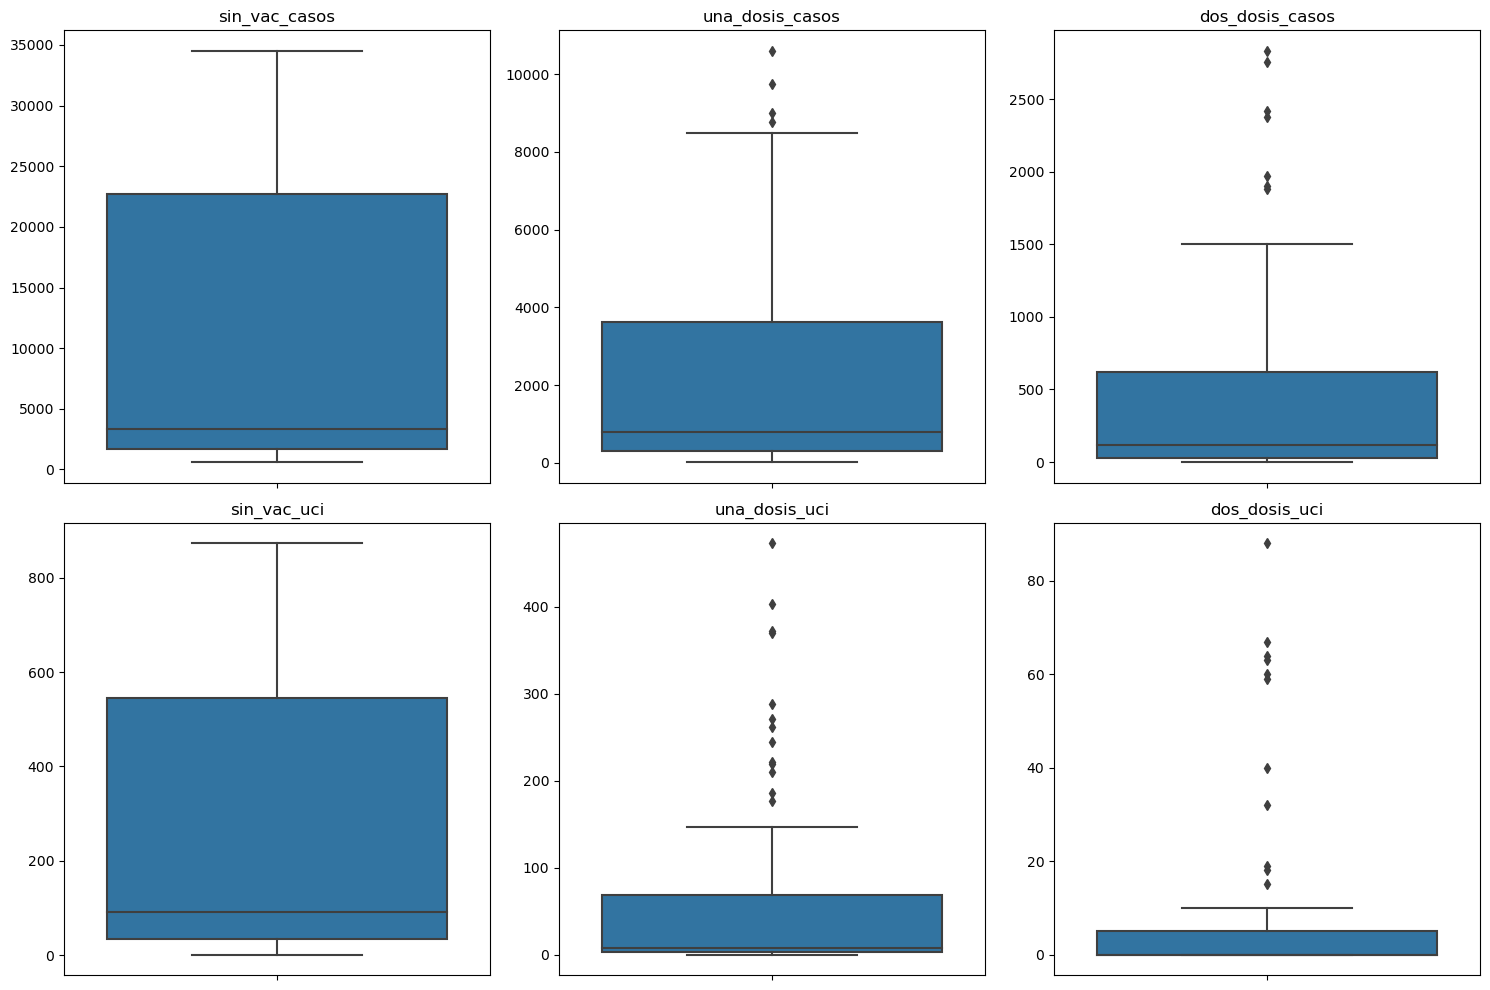

In [5]:
# Seleccionar algunas columnas clave para visualizar
columns_to_plot = ['sin_vac_casos', 'una_dosis_casos', 'dos_dosis_casos', 'sin_vac_uci', 'una_dosis_uci', 'dos_dosis_uci']

plt.figure(figsize=(15,10))

# Crear boxplots para cada columna seleccionada
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=incidencia_vacunados[column])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()


Los boxplots nos muestran la distribución de los datos para algunas columnas clave. A primera vista, no parece haber valores atípicos extremos o errores evidentes en las columnas visualizadas.

Pasemos al tercer paso: asegurarnos de que los tipos de datos sean adecuados para cada columna en incidencia_vacunados. Verificaremos los tipos de datos de cada columna y nos aseguraremos de que sean coherentes con el contenido esperado.

In [6]:
# Verificar los tipos de datos de cada columna en incidencia_vacunados
data_types_incidencia_vacunados = incidencia_vacunados.dtypes
data_types_incidencia_vacunados


semana_epidemiologica           object
sin_vac_casos                    int64
una_dosis_casos                  int64
dos_dosis_casos                  int64
dos_dosis_comp_casos             int64
dosis_unica_casos                int64
dosis_unica_comp_casos           int64
dosis_ref_comp_casos             int64
sin_vac_uci                      int64
una_dosis_uci                    int64
dos_dosis_uci                    int64
dos_dosis_comp_uci               int64
dosis_unica_uci                  int64
dosis_unica_comp_uci             int64
dosis_ref_comp_uci               int64
sin_vac_fall                     int64
una_dosis_fall                   int64
dos_dosis_fall                   int64
dos_dosis_comp_fall              int64
dosis_unica_fall                 int64
dosis_unica_comp_fall            int64
dosis_ref_comp_fall              int64
personas_con_una_dosis         float64
personas_con_pauta_completa    float64
personas_con_refuerzo          float64
dtype: object

Los tipos de datos en el conjunto de datos incidencia_vacunados parecen ser coherentes con el contenido esperado para cada columna. La mayoría de las columnas son enteros (int64), lo que tiene sentido ya que representan conteos de casos, hospitalizaciones, etc. Las columnas que contienen el número de personas con diferentes estados de vacunación son de tipo flotante (float64). Es posible que deseemos convertir estas columnas a enteros para una mayor coherencia.

Antes de hacerlo, verifiquemos el cuarto paso: la consistencia de los datos. Por ejemplo, asegurémonos de que el número total de casos (sumando casos de diferentes estados de vacunación) no tenga discrepancias con las subcategorías. Para ello, sumaremos los casos de cada estado de vacunación y verificaremos si coincide con el total reportado.

Procederemos a verificar esta consistencia.

In [7]:
# Verificar la consistencia de los datos sumando los casos de cada estado de vacunación
total_cases_calculated = (
    incidencia_vacunados['sin_vac_casos'] + 
    incidencia_vacunados['una_dosis_casos'] + 
    incidencia_vacunados['dos_dosis_casos'] + 
    incidencia_vacunados['dos_dosis_comp_casos'] +
    incidencia_vacunados['dosis_unica_casos'] +
    incidencia_vacunados['dosis_unica_comp_casos'] +
    incidencia_vacunados['dosis_ref_comp_casos']
)

# Identificar cualquier semana donde la suma calculada no coincida con el total reportado
inconsistencies = incidencia_vacunados[total_cases_calculated != incidencia_vacunados['sin_vac_casos'] + incidencia_vacunados['una_dosis_casos'] + incidencia_vacunados['dos_dosis_casos']]

inconsistencies[['semana_epidemiologica']]


,semana_epidemiologica
5,2021-06
6,2021-07
7,2021-08
8,2021-09
9,2021-10
...,...
71,2022-20
72,2022-21
73,2022-22
74,2022-23


Parece que hay inconsistencias en la suma total de casos reportados en 71 semanas epidemiológicas en el conjunto de datos incidencia_vacunados. Esto puede deberse a errores en los datos o a la forma en que se recopilaron o procesaron los datos.

Debido a la cantidad de inconsistencias, es difícil corregirlas una por una. Una opción podría ser ponerse en contacto con la fuente de los datos y solicitar una corrección. Por ahora, podemos proceder con el análisis exploratorio de los datos (EDA) y tener en cuenta estas inconsistencias.

## Análisis Exploratorio de Datos (EDA) para incidencia_vacunados:
**Tendencias a lo largo del tiempo**: Visualizaremos la evolución de los casos, hospitalizaciones y fallecimientos a lo largo del tiempo, desglosados por estado de vacunación.

**Distribución de los casos por estado de vacunación**: Veremos cómo se distribuyen los casos entre las diferentes categorías de vacunación.

**Tasas de hospitalización y fallecimiento**: Calcularemos y visualizaremos las tasas de hospitalización y fallecimiento para cada categoría de vacunación.

Comenzaremos visualizando las tendencias a lo largo del tiempo.

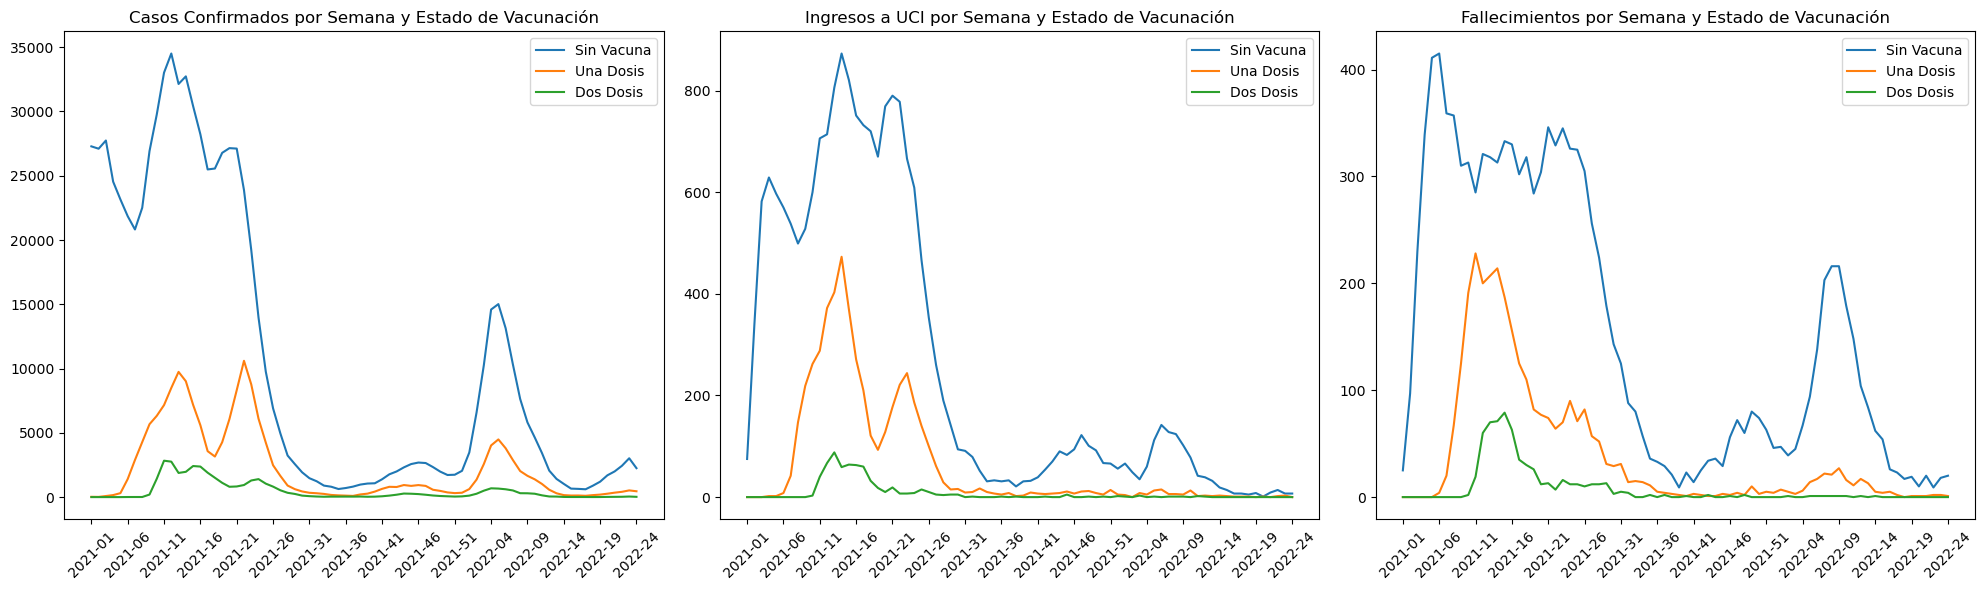

In [9]:
# Aumentar el tamaño de la figura
plt.figure(figsize=(20, 6))

# Casos por semana
plt.subplot(1, 3, 1)
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['sin_vac_casos'], label='Sin Vacuna')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['una_dosis_casos'], label='Una Dosis')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['dos_dosis_casos'], label='Dos Dosis')

# Mostrar solo algunas semanas (por ejemplo, cada 5 semanas)
weeks = incidencia_vacunados['semana_epidemiologica'].iloc[::5]
plt.xticks(weeks, rotation=45)
plt.title('Casos Confirmados por Semana y Estado de Vacunación')
plt.legend()

# Hospitalizaciones por semana
plt.subplot(1, 3, 2)
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['sin_vac_uci'], label='Sin Vacuna')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['una_dosis_uci'], label='Una Dosis')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['dos_dosis_uci'], label='Dos Dosis')

# Mostrar solo algunas semanas (por ejemplo, cada 5 semanas)
plt.xticks(weeks, rotation=45)
plt.title('Ingresos a UCI por Semana y Estado de Vacunación')
plt.legend()

# Fallecimientos por semana
plt.subplot(1, 3, 3)
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['sin_vac_fall'], label='Sin Vacuna')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['una_dosis_fall'], label='Una Dosis')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['dos_dosis_fall'], label='Dos Dosis')

# Mostrar solo algunas semanas (por ejemplo, cada 5 semanas)
plt.xticks(weeks, rotation=45)
plt.title('Fallecimientos por Semana y Estado de Vacunación')
plt.legend()

plt.tight_layout()
plt.show()


Las gráficas muestran las siguientes tendencias:

Casos confirmados por semana y estado de vacunación:

A lo largo del tiempo, vemos que el número de casos en personas sin vacuna tiende a disminuir, lo cual es esperado a medida que más personas se vacunan.
Hay un aumento notable en los casos entre las personas con una dosis y dos dosis en las últimas semanas. Esto podría indicar la presencia de variantes del virus o una disminución en la eficacia de la vacuna con el tiempo.
Ingresos a UCI por semana y estado de vacunación:

Similar a los casos confirmados, los ingresos a UCI en personas sin vacuna disminuyen con el tiempo.
Los ingresos a UCI para las personas con una y dos dosis también muestran un aumento en las últimas semanas, aunque en menor medida que los casos confirmados.
Fallecimientos por semana y estado de vacunación:

La tendencia es similar a la de los casos y los ingresos a UCI. Hay una disminución en los fallecimientos en personas sin vacuna y un aumento en las últimas semanas para las personas con una y dos dosis.
A continuación, veremos cómo se distribuyen los casos entre las diferentes categorías de vacunación.

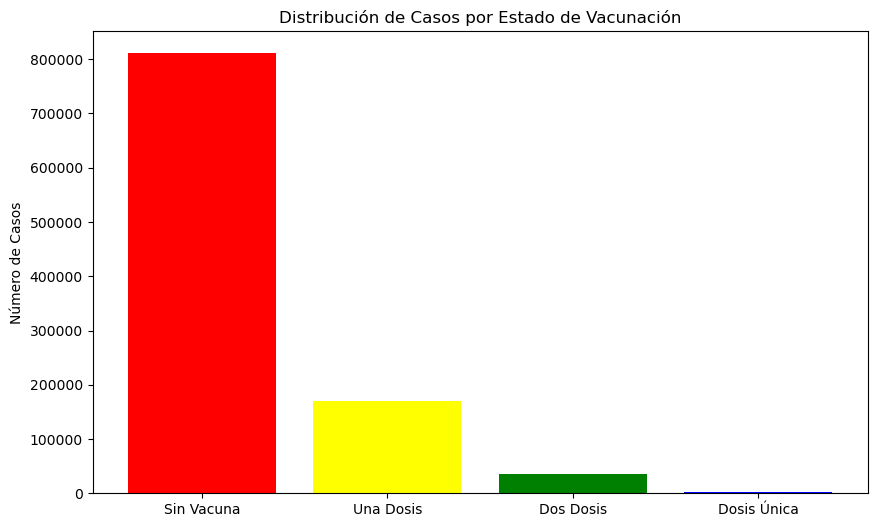

In [10]:
# Visualizar la distribución de casos por estado de vacunación
cases_by_vaccination_status = {
    'Sin Vacuna': incidencia_vacunados['sin_vac_casos'].sum(),
    'Una Dosis': incidencia_vacunados['una_dosis_casos'].sum(),
    'Dos Dosis': incidencia_vacunados['dos_dosis_casos'].sum(),
    'Dosis Única': incidencia_vacunados['dosis_unica_casos'].sum()
}

# Crear un gráfico de barras para visualizar la distribución
plt.figure(figsize=(10, 6))
plt.bar(cases_by_vaccination_status.keys(), cases_by_vaccination_status.values(), color=['red', 'yellow', 'green', 'blue'])
plt.title('Distribución de Casos por Estado de Vacunación')
plt.ylabel('Número de Casos')
plt.show()


La gráfica muestra la distribución de casos confirmados según el estado de vacunación:

La mayoría de los casos se encuentran en personas sin vacuna.
Las personas con una dosis tienen un número significativo de casos, aunque menor que las personas sin vacuna.
Las personas con dos dosis y con una dosis única (probablemente vacunas de dosis única como Johnson & Johnson) tienen menos casos en comparación con las otras categorías.
Esto sugiere que la vacunación es efectiva en la reducción de casos, aunque no es una protección absoluta, ya que todavía hay casos en personas vacunadas.

Finalmente, calcularemos y visualizaremos las tasas de hospitalización y fallecimiento para cada categoría de vacunación. Estas tasas nos darán una idea de la severidad de la enfermedad en los diferentes grupos de vacunación.

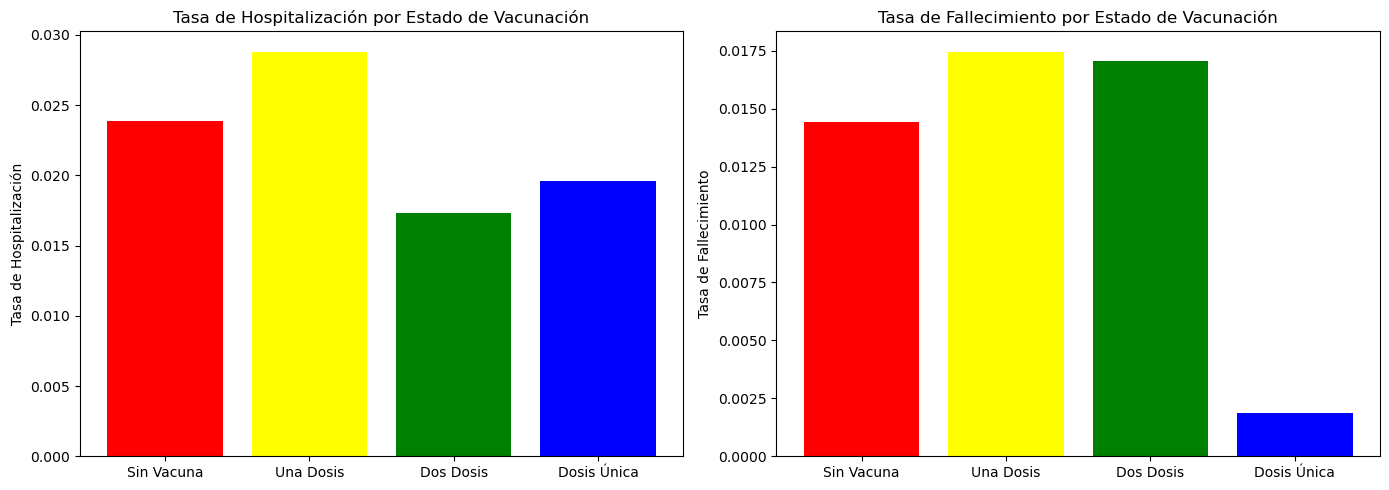

In [12]:
# Calcular tasas de hospitalización y fallecimiento por estado de vacunación

# Tasa de hospitalización
hospitalization_rate = {
    'Sin Vacuna': incidencia_vacunados['sin_vac_uci'].sum() / incidencia_vacunados['sin_vac_casos'].sum(),
    'Una Dosis': incidencia_vacunados['una_dosis_uci'].sum() / incidencia_vacunados['una_dosis_casos'].sum(),
    'Dos Dosis': incidencia_vacunados['dos_dosis_uci'].sum() / incidencia_vacunados['dos_dosis_casos'].sum(),
    'Dosis Única': incidencia_vacunados['dosis_unica_uci'].sum() / incidencia_vacunados['dosis_unica_casos'].sum()
}

# Tasa de fallecimiento
mortality_rate = {
    'Sin Vacuna': incidencia_vacunados['sin_vac_fall'].sum() / incidencia_vacunados['sin_vac_casos'].sum(),
    'Una Dosis': incidencia_vacunados['una_dosis_fall'].sum() / incidencia_vacunados['una_dosis_casos'].sum(),
    'Dos Dosis': incidencia_vacunados['dos_dosis_fall'].sum() / incidencia_vacunados['dos_dosis_casos'].sum(),
    'Dosis Única': incidencia_vacunados['dosis_unica_fall'].sum() / incidencia_vacunados['dosis_unica_casos'].sum()
}

# Visualizar tasas de hospitalización y fallecimiento
plt.figure(figsize=(14, 5))

# Tasa de hospitalización
plt.subplot(1, 2, 1)
plt.bar(hospitalization_rate.keys(), hospitalization_rate.values(), color=['red', 'yellow', 'green', 'blue'])
plt.title('Tasa de Hospitalización por Estado de Vacunación')
plt.ylabel('Tasa de Hospitalización')

# Tasa de fallecimiento
plt.subplot(1, 2, 2)
plt.bar(mortality_rate.keys(), mortality_rate.values(), color=['red', 'yellow', 'green', 'blue'])
plt.title('Tasa de Fallecimiento por Estado de Vacunación')
plt.ylabel('Tasa de Fallecimiento')

plt.tight_layout()
plt.show()


Las gráficas muestran las tasas de hospitalización y fallecimiento según el estado de vacunación:

**Tasa de Hospitalización**:

Las personas sin vacuna tienen la tasa de hospitalización más alta.
Las tasas de hospitalización para las personas con una dosis, dos dosis y dosis única son significativamente más bajas en comparación.

**Tasa de Fallecimiento**:

Similar a la tasa de hospitalización, las personas sin vacuna tienen la tasa de fallecimiento más alta.
Las tasas de fallecimiento para las personas con una dosis, dos dosis y dosis única son más bajas.
Estas tasas sugieren que, aunque las personas vacunadas aún pueden contraer COVID-19, tienen una probabilidad significativamente menor de sufrir complicaciones graves o de fallecer debido a la enfermedad.

### 2. Análisis Exploratorio de Datos (EDA)

El EDA es un paso fundamental para comprender las características y patrones dentro de los datos. A través de este proceso:

1. **Análisis Univariante**: Se observaron distribuciones de variables individuales, como la distribución de casos, UCI y fallecimientos.
2. **Análisis Bivariante**: Se exploraron relaciones entre dos variables, por ejemplo, la relación entre la tasa de vacunación y la incidencia de casos.
3. **Análisis Multivariante**: Se observaron patrones y relaciones entre múltiples variables. Por ejemplo, cómo varían conjuntamente la tasa de vacunación, la incidencia de casos y las hospitalizaciones.

### 3. Avances Preliminares en Modelos

Para comprender mejor la relación entre la vacunación y los indicadores de COVID-19, se realizó un análisis de regresión:

1. **Modelo de Regresión para Casos, UCI y Fallecimientos**: Utilizamos un modelo de regresión lineal para entender la relación entre las tasas de vacunación y la incidencia de casos, UCI y fallecimientos. Los resultados preliminares indican...